In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

<div style="text-align: center; background-color: orange; padding: 10px;">
    <h2 style="font-weight: bold;">MONTHLY INSTALLMENT AFFORDABILITY</h2>
</div>

In [2]:
data_new=pd.read_csv('MSB-Mortgage-Backed-Securities-Pipeline-main-LoanExport.csv')

In [3]:
data_new.head()

,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,...,LTV_Range,CreditRange,RePayRange,OrigInterestRate_Monthly,MonthlyInstallment,CurrentUPB,MonthlyIncome,Prepayment,Totalpayment,InterestAmount
0,16974,25,1,O,89,27,117000,6.750,T,N,...,High,Excellent,4-8yrs,0.0056,756,111758,2800,15456,272160,155160
1,19740,0,1,O,73,17,109000,6.500,R,N,...,High,Excellent,12-16yrs,0.0054,687,94830,4041,31992,247320,138320
2,29940,0,1,O,75,16,88000,6.875,T,N,...,High,Excellent,4-8yrs,0.0057,576,83015,3600,29376,207360,119360
3,31084,0,1,O,76,14,160000,6.875,R,N,...,High,Excellent,0-4yrs,0.0057,1047,155275,7478,64608,376920,216920
4,35644,0,1,O,78,18,109000,7.125,R,N,...,High,Excellent,4-8yrs,0.0059,731,104253,4061,31176,263160,154160


In [4]:
data_new.drop(['EverDelinquent','Prepayment','SellerName'],inplace=True,axis=1)

In [5]:

# Define a threshold for monthly installment affordability
affordability_threshold = 0.3 #installment should be less than 30% of monthly income

# Create the AffordabilityRisk binary indicator
data_new['AffordabilityRisk'] = ((data_new['MonthlyInstallment'] / data_new['MonthlyIncome']) > affordability_threshold).astype(int)  # 1 if installment is more than 30% of income, 0 otherwise

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_col=['IsFirstTimeHomebuyer','PPM','PropertyState','ServicerName','PropertyType','Channel','LTV_Range','CreditRange','RePayRange']
data_new[cat_col]=data_new[cat_col].apply(le.fit_transform)
data_new.head()

,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,...,LTV_Range,CreditRange,RePayRange,OrigInterestRate_Monthly,MonthlyInstallment,CurrentUPB,MonthlyIncome,Totalpayment,InterestAmount,AffordabilityRisk
0,16974,25,1,O,89,27,117000,6.750,3,0,...,0,0,3,0.0056,756,111758,2800,272160,155160,0
1,19740,0,1,O,73,17,109000,6.500,2,0,...,0,0,1,0.0054,687,94830,4041,247320,138320,0
2,29940,0,1,O,75,16,88000,6.875,3,0,...,0,0,3,0.0057,576,83015,3600,207360,119360,0
3,31084,0,1,O,76,14,160000,6.875,2,0,...,0,0,0,0.0057,1047,155275,7478,376920,216920,0
4,35644,0,1,O,78,18,109000,7.125,2,0,...,0,0,3,0.0059,731,104253,4061,263160,154160,0


In [7]:
one_col=['LoanPurpose','Occupancy']
data_one=pd.get_dummies(data_new[one_col], drop_first=True)
data_one.head()

,LoanPurpose_N,LoanPurpose_P,Occupancy_O,Occupancy_S
0,0,1,1,0
1,1,0,1,0
2,1,0,1,0
3,1,0,1,0
4,1,0,1,0


In [8]:
data_new=pd.concat([data_new,data_one], axis = 1)
data_new.drop(['LoanPurpose','Occupancy'],inplace=True,axis=1)
data_new.head()

,MSA,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,PropertyState,...,MonthlyInstallment,CurrentUPB,MonthlyIncome,Totalpayment,InterestAmount,AffordabilityRisk,LoanPurpose_N,LoanPurpose_P,Occupancy_O,Occupancy_S
0,16974,25,1,89,27,117000,6.750,3,0,15,...,756,111758,2800,272160,155160,0,0,1,1,0
1,19740,0,1,73,17,109000,6.500,2,0,5,...,687,94830,4041,247320,138320,0,1,0,1,0
2,29940,0,1,75,16,88000,6.875,3,0,17,...,576,83015,3600,207360,119360,0,1,0,1,0
3,31084,0,1,76,14,160000,6.875,2,0,4,...,1047,155275,7478,376920,216920,0,1,0,1,0
4,35644,0,1,78,18,109000,7.125,2,0,32,...,731,104253,4061,263160,154160,0,1,0,1,0


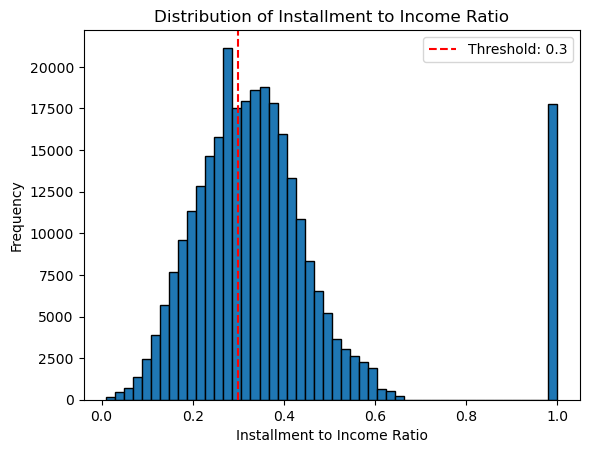

In [9]:
import matplotlib.pyplot as plt

plt.hist(data_new['MonthlyInstallment'] / data_new['MonthlyIncome'], bins=50, edgecolor='k')
plt.axvline(x=affordability_threshold, color='r', linestyle='--', label=f'Threshold: {affordability_threshold}')
plt.xlabel('Installment to Income Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Installment to Income Ratio')
plt.legend()
plt.show()

In [10]:
X= data_new.drop('AffordabilityRisk',axis=1)
y = data_new.AffordabilityRisk

import pandas as pd

# Assuming 'data' is your DataFrame and 'AffordabilityRisk' is your target variable

# Calculate correlation matrix
correlation_matrix = data_new.corr()

# Get the correlation of each feature with the target variable 'AffordabilityRisk'
affordability_corr = correlation_matrix['AffordabilityRisk'].abs()

# Get top 10 features excluding the target itself
top_features = affordability_corr.sort_values(ascending=False).index[1:11]

print("Top 10 Features based on correlation with Affordability:\n", top_features)


Top 10 Features based on correlation with Affordability:
 Index(['DTI', 'MonthlyIncome', 'OCLTV', 'CreditRange', 'InterestAmount',
       'CurrentUPB', 'Totalpayment', 'MonthlyInstallment', 'OrigUPB',
       'NumBorrowers'],
      dtype='object')


In [11]:
X=X[top_features]

In [12]:
X

,DTI,MonthlyIncome,OCLTV,CreditRange,InterestAmount,CurrentUPB,Totalpayment,MonthlyInstallment,OrigUPB,NumBorrowers
0,27,2800,89,0,155160,111758,272160,756,117000,2
1,17,4041,73,0,138320,94830,247320,687,109000,1
2,16,3600,75,0,119360,83015,207360,576,88000,2
3,14,7478,76,0,216920,155275,376920,1047,160000,2
4,18,4061,78,0,154160,104253,263160,731,109000,2
...,...,...,...,...,...,...,...,...,...,...
291398,32,1862,60,0,124560,89112,214560,596,90000,2
291399,0,1736,73,0,286784,249992,553784,1736,267000,2
291400,31,1712,73,0,79203,82360,166203,531,87000,1
291401,54,1079,80,0,121880,85676,209880,583,88000,2


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Train a model with the selected features
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Prepayment Risk Prediction Accuracy Score:", accuracy_score(y_test, y_pred))
print("Prepayment Risk Classification Report:\n", classification_report(y_test, y_pred))

Prepayment Risk Prediction Accuracy Score: 0.9895163089171428
Prepayment Risk Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     23927
           1       0.98      1.00      0.99     34354

    accuracy                           0.99     58281
   macro avg       0.99      0.99      0.99     58281
weighted avg       0.99      0.99      0.99     58281



In [16]:
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model_nb.predict(X_test_scaled)

# Evaluate the model
print("Prepayment Risk Prediction Accuracy Score:", accuracy_score(y_test, y_pred))
print("Prepayment Risk Classification Report:\n", classification_report(y_test, y_pred))

Prepayment Risk Prediction Accuracy Score: 0.8965700657160995
Prepayment Risk Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.86     23927
           1       0.86      0.99      0.92     34354

    accuracy                           0.90     58281
   macro avg       0.92      0.88      0.89     58281
weighted avg       0.91      0.90      0.89     58281



In [17]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred= rf_model.predict(X_test_scaled)

# Evaluate the model
print("Prepayment Risk Prediction Accuracy Score:", accuracy_score(y_test, y_pred))
print("Prepayment Risk Classification Report:\n", classification_report(y_test, y_pred))

Prepayment Risk Prediction Accuracy Score: 0.9975806866731868
Prepayment Risk Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23927
           1       1.00      1.00      1.00     34354

    accuracy                           1.00     58281
   macro avg       1.00      1.00      1.00     58281
weighted avg       1.00      1.00      1.00     58281



In [18]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred= xgb_model.predict(X_test_scaled)

# Evaluate the model
print("Prepayment Risk Prediction Accuracy Score:", accuracy_score(y_test, y_pred))
print("Prepayment Risk Classification Report:\n", classification_report(y_test, y_pred))

Prepayment Risk Prediction Accuracy Score: 0.9974434206688286
Prepayment Risk Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23927
           1       1.00      1.00      1.00     34354

    accuracy                           1.00     58281
   macro avg       1.00      1.00      1.00     58281
weighted avg       1.00      1.00      1.00     58281



In [19]:
import joblib

# Save the pipeline
joblib.dump(model_nb, 'MBS_affordability_pipeline.pkl')
pipeline = joblib.load('MBS_affordability_pipeline.pkl')